<a href="https://colab.research.google.com/github/EArslan14/300-Random-Movies-Exercise/blob/main/2023184_student_cct_ie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Packages

In [ ]:
# pyspark

!pip install pyspark

In [ ]:
!pip install -U textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1


In [ ]:
!pip install tensorflow

In [ ]:
!pip install gensim

In [ ]:
!pip install wordcloud

In [ ]:
!pip install plotly

In [ ]:
!pip install statsmodels

In [ ]:
!pip install scikit-learn

In [ ]:
# Install dashboard packages
!pip install dash dash-bootstrap-components plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


## Import Libraries

In [ ]:
# - - - - - - - - - - - - - - - - - spark - - - - - - - - - - - - - -

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim

# - - - - - - - - - - - - - - - - - base - - - - - - - - - - - - - -

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# - - - - - - - - - - - - - - - - - nlp - - - - - - - - - - - - - -

import gensim
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer


# - - - - - - - - - - - - - - - - - Machine Learning Model - - - - - - - - - - - - - -

import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# - - - - - - - - - - - - - - - - - import dashboard  - - - - - - - - - - - - - -

from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px



## Upload Dataset

In [ ]:
#upload dataset
stocktweet = pd.read_csv('/content/stocktweet.csv')

In [ ]:
# Folder where the CSV files are located
folder_path = '/content/stockprice/'

# List of company tickers
tickers = ['AAPL', 'ABNB', 'AMT', 'AMZN', 'BA', 'BABA', 'BAC', 'BKNG', 'BRK-A', 'BRK-B', 'CCL', 'CVX',
           'DIS', 'FB', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'KO', 'LOW', 'MA', 'MCD', 'MSFT', 'NFLX',
           'NKE', 'NVDA', 'PFE', 'PG', 'PYPL', 'SBUX', 'TM', 'TSLA', 'TSM', 'UNH', 'UPS', 'V', 'WMT', 'XOM']

# Create an empty list to store dataframes
dataframes = []

for ticker in tickers:
    file_path = os.path.join(folder_path, f'{ticker}.csv')
    if os.path.exists(file_path):
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Add a column for the ticker symbol
        df['Ticker'] = ticker
        dataframes.append(df)
    else:
        print(f"{ticker}.csv file not found.")

# Concatenate all dataframes
stockprice = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
stockprice.to_csv('/content/stockprice/stockprice.csv', index=False)

print("CSV files have been successfully merged and saved as stockprice.csv.")


CSV files have been successfully merged and saved as stockprice.csv.


# BIG DATA

1.	Details of the data storage and processing activities carried out, including preparation of the data and processing the data in a MapReduce/ Spark environment;[0-30]

## Create Spark

In [ ]:
# Create a Spark session
spark1 = SparkSession.builder.appName('StockPrice').getOrCreate()

In [ ]:
spark1

In [ ]:
# Create a Spark session
spark2 = SparkSession.builder.appName('StockTweet').getOrCreate()

In [ ]:
spark2

1.1. Initialize Spark Session:

In [ ]:

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Stock Data Processing") \
    .getOrCreate()


1.2. Load Data:

In [ ]:
# Load financial price data
stockprice_df = spark.read.csv('/content/stockprice/stockprice.csv', header=True, inferSchema=True)

# Load tweet data
stocktweet_df = spark.read.csv('/content/stocktweet.csv', header=True, inferSchema=True)


1.3. Data Cleaning and Transformation:

In [ ]:

# Clean and transform financial data
stockprice_df = stockprice_df \
    .withColumn('Date', to_date(col('Date'), 'yyyy-MM-dd')) \
    .withColumn('Close', col('Close').cast('float')) \
    .dropDuplicates()

# Clean and transform tweet data
stocktweet_df = stocktweet_df \
    .withColumn('Date', to_date(col('Date'), 'yyyy-MM-dd')) \
    .withColumn('Tweet', trim(col('Tweet'))) \
    .dropDuplicates()


In [ ]:
# show dataset
stockprice_df.show(10)

+----------+------------------+-----------------+------------------+--------+------------------+---------+------+
|      Date|              Open|             High|               Low|   Close|         Adj Close|   Volume|Ticker|
+----------+------------------+-----------------+------------------+--------+------------------+---------+------+
|2020-06-16| 87.86499786376953|88.30000305175781| 86.18000030517578|   88.02|  86.1880874633789|165428800|  AAPL|
|2020-03-12|  86.0989990234375|            88.25|             83.75| 83.8305| 83.83049774169922|226924000|  AMZN|
|2020-03-05| 275.7900085449219|276.3099975585937| 259.6499938964844|  260.37| 260.3699951171875| 14669100|    BA|
|2020-11-18| 223.0200042724609|223.0200042724609|             203.0|   203.3| 203.3000030517578| 65990700|    BA|
|2020-07-29|250.33999633789065|254.3000030517578| 250.1000061035156|  252.45|249.10140991210935| 11493600|  BABA|
|2020-02-06|34.939998626708984| 35.0099983215332|34.599998474121094|   34.67| 31.3954257

In [ ]:
stocktweet_df.show(10)

+--------------------+----+------+--------------------+
|                  id|Date|ticker|               Tweet|
+--------------------+----+------+--------------------+
|              100043|NULL|  AAPL|$AAPL Bears & Sho...|
|              100122|NULL|  TSLA|$TSLA making mone...|
|              100229|NULL|  TSLA|What, you thought...|
|              100452|NULL|   XOM|$XOM This stock i...|
|              100479|NULL|  NFLX|$NFLX $360 breako...|
|NEVER DOUBT APPLE...|NULL|  NULL|                NULL|
|              100752|NULL|  MSFT|$MSFT  MY PT is $...|
|              100796|NULL|  TSLA|$TSLA wowwzers $9...|
|              100842|NULL|  TSLA|$TSLA So now that...|
|Now can we get ba...|NULL|  NULL|                NULL|
+--------------------+----+------+--------------------+
only showing top 10 rows



In [ ]:
# print schema
stockprice_df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: float (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Ticker: string (nullable = true)



In [ ]:
stocktweet_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- ticker: string (nullable = true)
 |-- Tweet: string (nullable = true)



In [ ]:
# columns
stockprice_df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker']

In [ ]:
stocktweet_df.columns

['id', 'Date', 'ticker', 'Tweet']

# Advanced Data Analytics

1.	A discussion of the rationale, evaluation, and justification for the choices you have made in terms of EDA, data wrangling, machine learning models and algorithms that you have implemented.[0-40]
2.	Evaluation and justification of the hyperparameter tuning techniques that you have used [0-20]


## EDA

Head and Tail

In [ ]:
stockprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,AAPL
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,AAPL
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,AAPL
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,AAPL
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,AAPL


In [ ]:
stocktweet.head()

,id,date,ticker,tweet
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏"
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars..."


Sample

In [ ]:
stockprice.sample()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
8801,2020-08-05,145.350006,146.0,143.279999,145.080002,130.583359,3939300,UPS


In [ ]:
stocktweet.sample()

,id,date,ticker,tweet
3523,103524,25/06/2020,TSLA,$TSLA \n\n$20k Compact Tesla car is in the ma...


Information about dataset

In [ ]:
###################################### INFORMATION ABOUT DATASET ######################################


# functional EDA analysis in IRL data

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())



In [ ]:
check_df(stockprice)

##################### Shape #####################
(9667, 8)
##################### Types #####################
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Ticker        object
dtype: object
##################### Head #####################
         Date       Open       High        Low      Close  Adj Close  \
0  2019-12-31  72.482498  73.419998  72.379997  73.412498  71.520821   
1  2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152649   
2  2020-01-03  74.287498  75.144997  74.125000  74.357498  72.441460   
3  2020-01-06  73.447502  74.989998  73.187500  74.949997  73.018677   
4  2020-01-07  74.959999  75.224998  74.370003  74.597504  72.675278   

      Volume Ticker  
0  100805600   AAPL  
1  135480400   AAPL  
2  146322800   AAPL  
3  118387200   AAPL  
4  108872000   AAPL  
##################### Tail #####################
            Date       Open       High       

In [ ]:
check_df(stocktweet)

##################### Shape #####################
(10000, 4)
##################### Types #####################
id         int64
date      object
ticker    object
tweet     object
dtype: object
##################### Head #####################
       id        date ticker  \
0  100001  01/01/2020   AMZN   
1  100002  01/01/2020   TSLA   
2  100003  01/01/2020   AAPL   
3  100004  01/01/2020   TSLA   
4  100005  01/01/2020   TSLA   

                                               tweet  
0       $AMZN Dow futures up by 100 points already 🥳  
1  $TSLA Daddy's drinkin' eArly tonight! Here's t...  
2  $AAPL We’ll been riding since last December fr...  
3            $TSLA happy new year, 2020, everyone🍷🎉🙏  
4  $TSLA haha just a collection of greats..."Mars...  
##################### Tail #####################
          id        date ticker  \
9995  109996  31/12/2020   ABNB   
9996  109997  31/12/2020   TSLA   
9997  109998  31/12/2020   BABA   
9998  109999  31/12/2020    CCL   
9999  11000

Data Visualisation

Convert datetime

In [ ]:
# Load the datasets
stockprice = pd.read_csv('/content/stockprice/stockprice.csv')
stocktweet = pd.read_csv('stocktweet.csv')

# Convert the date columns to datetime format
stockprice['Date'] = pd.to_datetime(stockprice['Date'])
stocktweet['date'] = pd.to_datetime(stocktweet['date'], format='%d/%m/%Y')


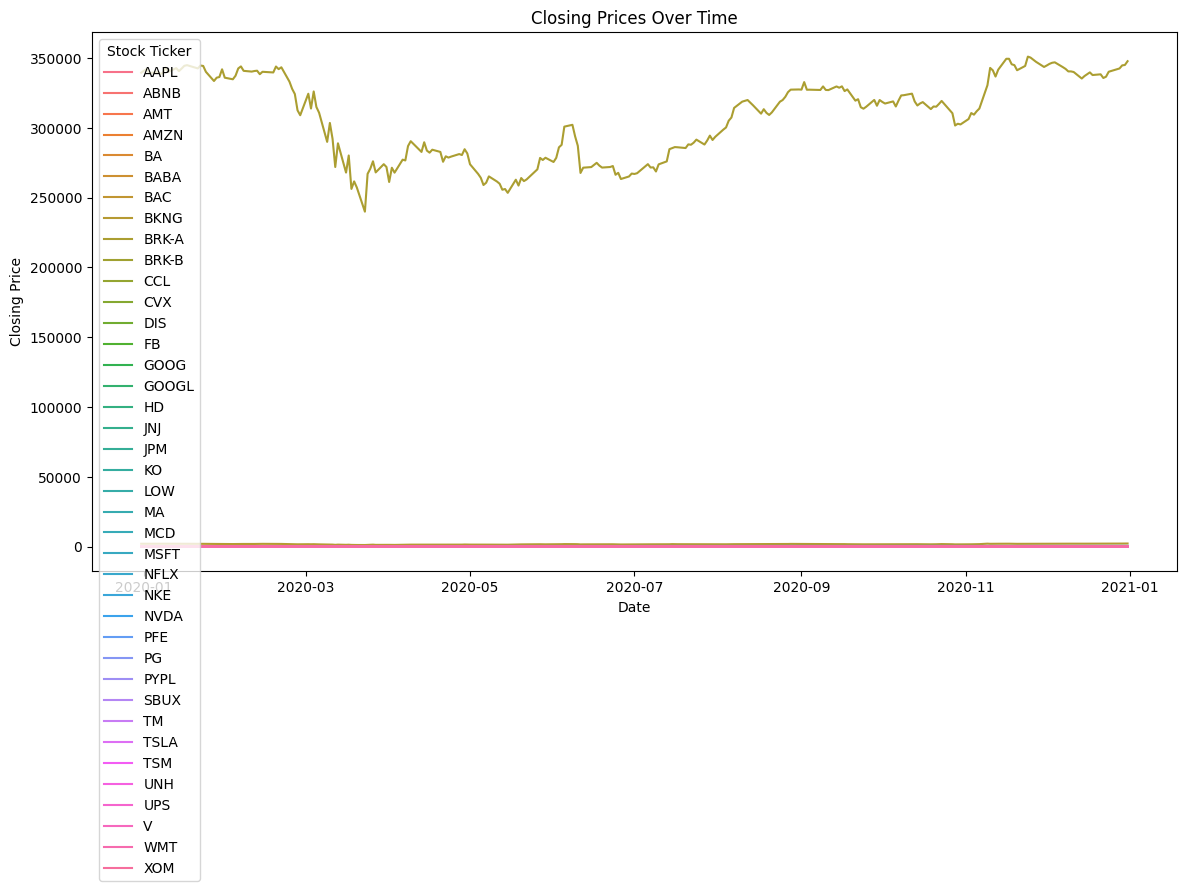

In [ ]:
# Time series plot of closing prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=stockprice, x='Date', y='Close', hue='Ticker')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Stock Ticker')
plt.show()


Volume Distribution Plot

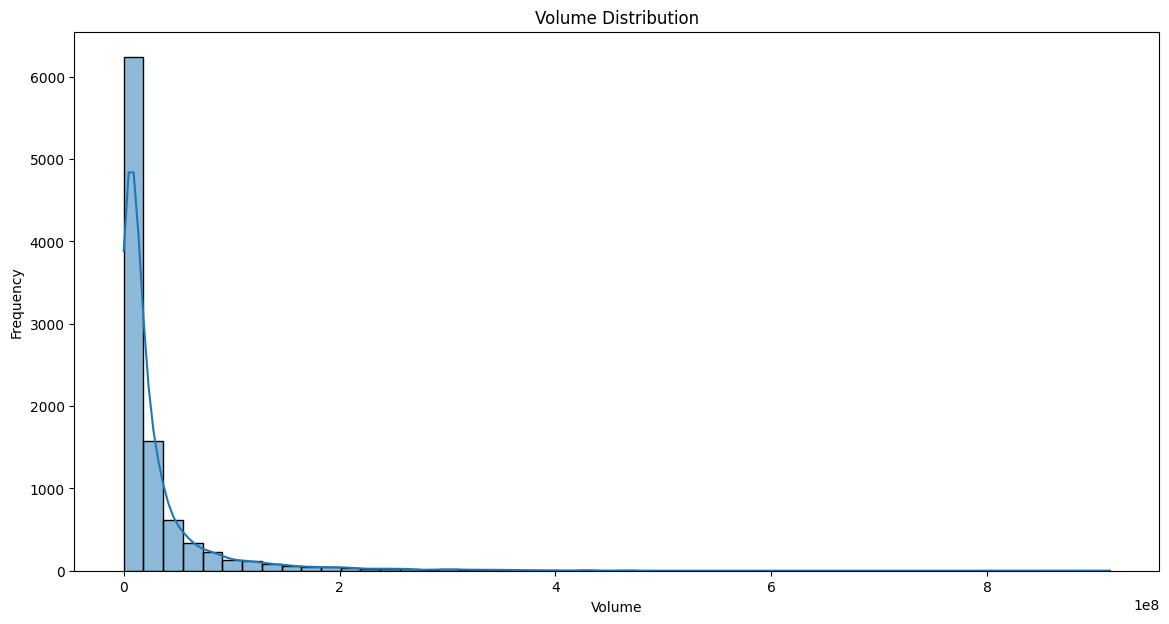

In [ ]:
# Distribution plot of trading volume
plt.figure(figsize=(14, 7))
sns.histplot(stockprice, x='Volume', bins=50, kde=True)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


Price Box Plot

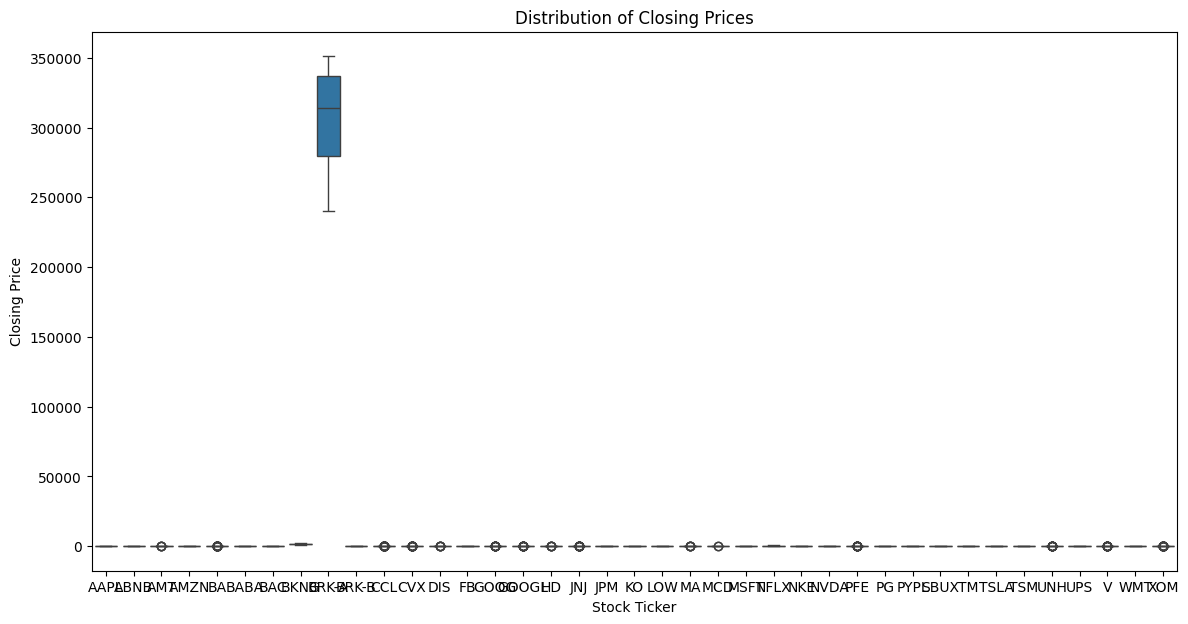

In [ ]:
# Box plot of closing prices
plt.figure(figsize=(14, 7))
sns.boxplot(data=stockprice, x='Ticker', y='Close')
plt.title('Distribution of Closing Prices')
plt.xlabel('Stock Ticker')
plt.ylabel('Closing Price')
plt.show()

## Word Cloud

In [ ]:
#Make a word Cloud from dataset
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=40, max_words=700,background_color="#002210").generate(text)
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.style.use('ggplot')
    plt.show()

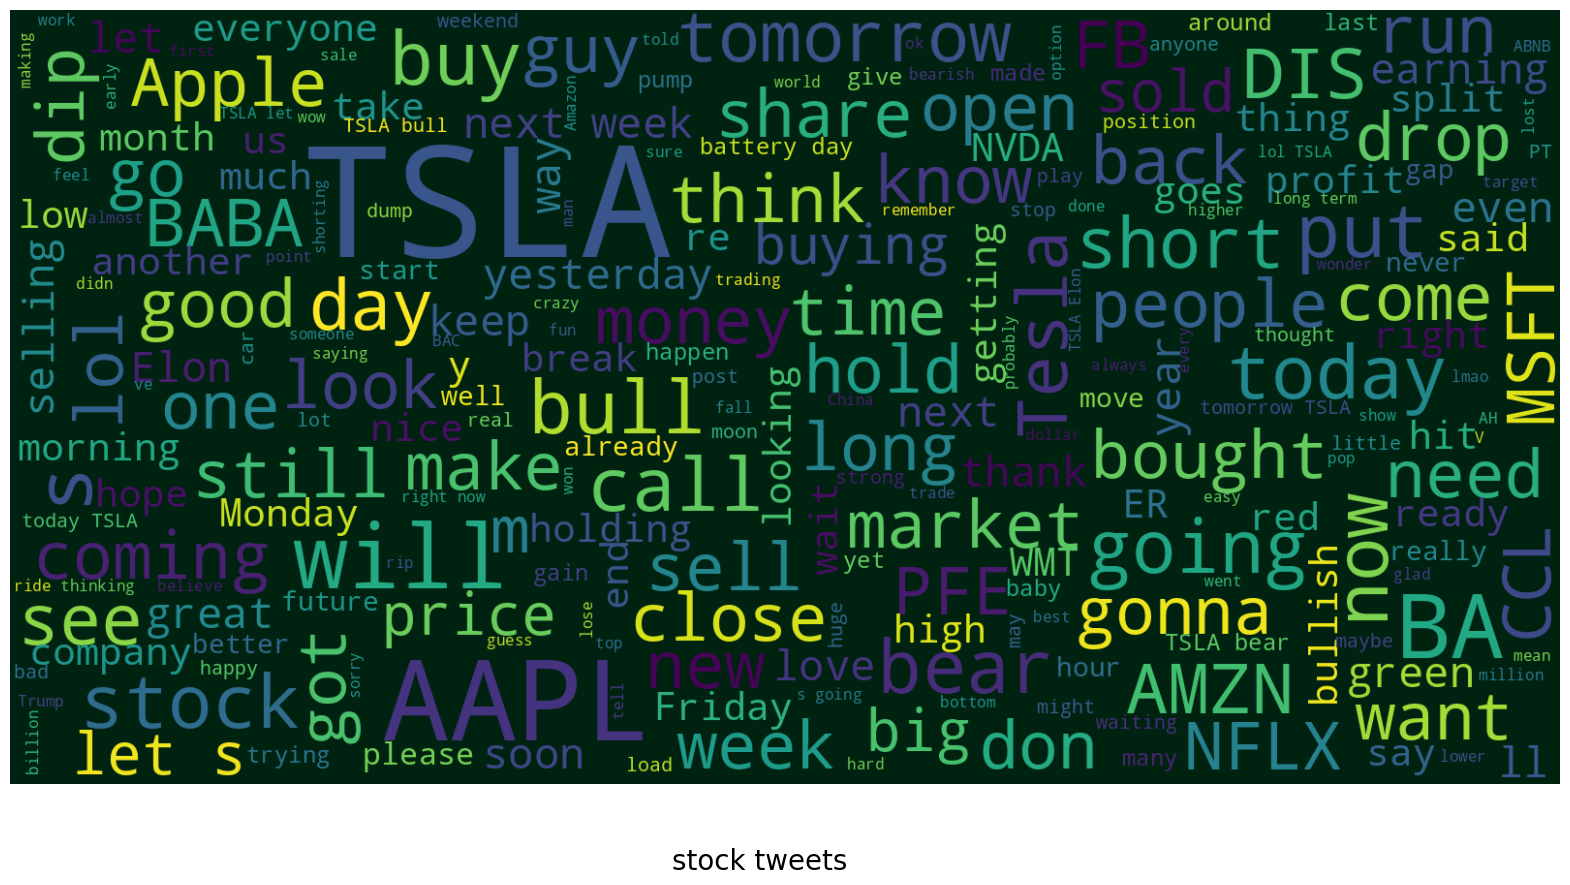

In [ ]:
show_wordcloud(stocktweet['tweet'] , title = 'stock tweets')

## Hastag Analysis

In [ ]:
# analysis to hastag
def plot_features_(features, title, tw, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(tw[feature]),kde=True,hist=False, bins=120, label=feature,color='blue')
        else:
            sns.distplot(tw[feature],kde=True, hist=False, bins=120, label=feature,color='blue')
    plt.xlabel('')
    plt.legend()
    plt.show();

## Preprocessing Dataset

In [ ]:
def depure_data(data):

    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)

    return data

In [ ]:
temp = []
#Splitting pd.Series to list
data_to_list = stocktweet["tweet"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['$AMZN Dow futures up by 100 points already 🥳',
 '$TSLA Daddys drinkin eArly tonight! Heres to a PT of ohhhhh $1000 in 2020! 🍻',
 '$AAPL We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?',
 '$TSLA happy new year, 2020, everyone🍷🎉🙏',
 '$TSLA haha just a collection of greats..."Mars" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['amzn', 'dow', 'futures', 'up', 'by', 'points', 'already'], ['tsla', 'daddys', 'drinkin', 'early', 'tonight', 'heres', 'to', 'pt', 'of', 'ohhhhh', 'in'], ['aapl', 'we', 'll', 'been', 'riding', 'since', 'last', 'december', 'from', 'what', 'to', 'do', 'decisions', 'decisions', 'hmm', 'have', 'mins', 'to', 'decide', 'any', 'suggestions'], ['tsla', 'happy', 'new', 'year', 'everyone'], ['tsla', 'haha', 'just', 'collection', 'of', 'greats', 'mars', 'rofl', 'bork'], ['tsla', 'nobody', 'gas', 'cars', 'driven', 'by', 'humans', 'killed', 'upon', 'in', 'tesla', 'shorts', 'omg', 'did', 'you', 'hear', 'people', 'died', 'from', 'tesla', 'crash'], ['aapl', 'calls', 'first', 'trade', 'of', 'congrats', 'to', 'all', 'bulls'], ['aapl', 'remember', 'if', 'you', 'short', 'every', 'day', 'one', 'of', 'those', 'days', 'you', 'will', 'be', 'right'], ['aapl', 'called', 'it', 'the', 'bear', 'comment', 'below', 'makes', 'me', 'chuckle', 'inside', 'so', 'sweeet'], ['hd', 'bought', 'more', 'at', 'todays', 'low',

In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['amzn dow futures up by points already', 'tsla daddys drinkin early tonight heres to pt of ohhhhh in', 'aapl we ll been riding since last december from what to do decisions decisions hmm have mins to decide any suggestions', 'tsla happy new year everyone', 'tsla haha just collection of greats mars rofl bork']


## Feature Engineering

Categorical and Numerical Values

stockprice

In [ ]:
# categorical

cat_cols = [col for col in stockprice.columns if str(stockprice[col].dtypes) in ["category","object","bool"] ]

cat_cols

['Ticker']

In [ ]:
# numerical summary

num_cols = [col for col in stockprice.columns if stockprice[col].dtypes in ["int","float"]]
num_cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

count      9667.000000
mean       8272.106307
std       49427.973797
min           8.010000
5%           32.278937
10%          44.360001
20%          72.276500
30%          91.906999
40%         116.000000
50%         134.809998
60%         158.229999
70%         198.267999
80%         233.992001
90%         318.870001
max      351900.000000
Name: Open, dtype: float64


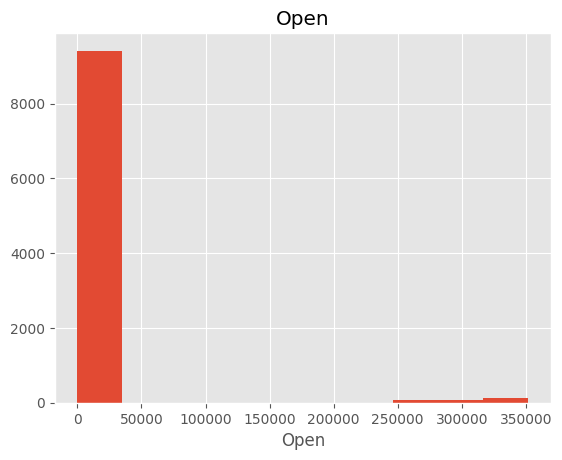

count      9667.000000
mean       8344.673064
std       49842.883764
min           8.530000
5%           33.029955
10%          45.068001
20%          73.420499
30%          93.689998
40%         117.370003
50%         136.309998
60%         160.606003
70%         200.510001
80%         237.798001
90%         323.619995
max      352500.000000
Name: High, dtype: float64


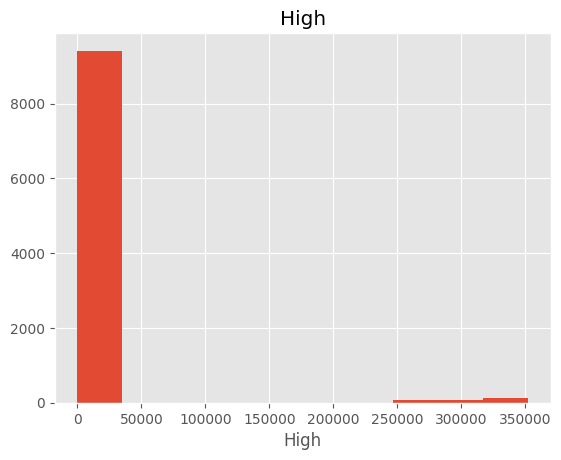

count      9667.000000
mean       8198.672700
std       49009.572102
min           7.800000
5%           31.521401
10%          43.516000
20%          71.388797
30%          90.366002
40%         114.556001
50%         133.119995
60%         155.496002
70%         195.671997
80%         230.663998
90%         314.923999
max      348446.000000
Name: Low, dtype: float64


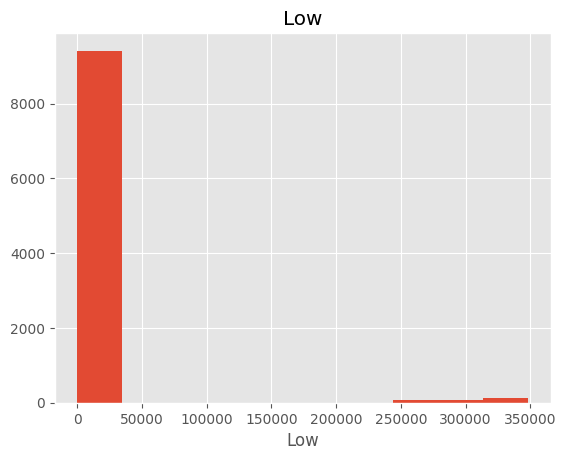

count      9667.000000
mean       8271.815278
std       49428.048184
min           7.970000
5%           32.091565
10%          44.131999
20%          72.450002
30%          91.707999
40%         116.117999
50%         134.643494
60%         158.005997
70%         198.446002
80%         234.085999
90%         318.601996
max      351101.000000
Name: Close, dtype: float64


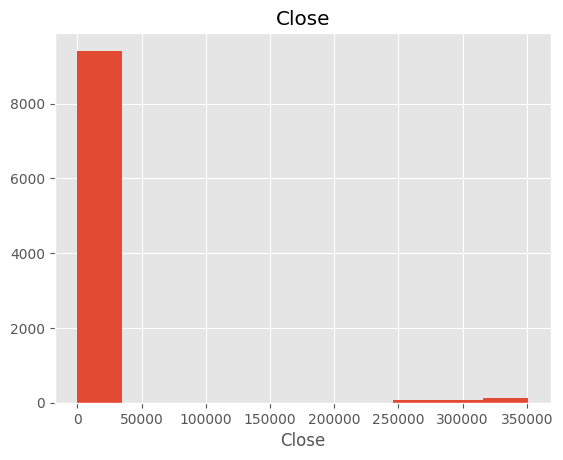

count      9667.000000
mean       8266.466580
std       49428.925468
min           7.970000
5%           28.186016
10%          38.816214
20%          70.336299
30%          86.933948
40%         109.534557
50%         129.360977
60%         152.420749
70%         192.959128
80%         223.925372
90%         309.420142
max      351101.000000
Name: Adj Close, dtype: float64


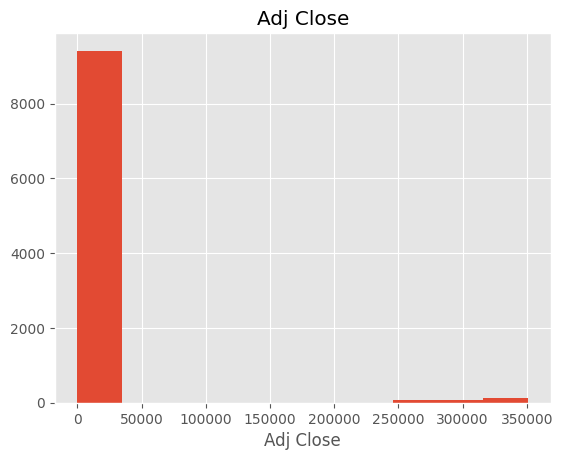

count    9.667000e+03
mean     2.798884e+07
std      5.137944e+07
min      1.000000e+02
5%       2.663100e+05
10%      2.034180e+06
20%      3.817880e+06
30%      5.542540e+06
40%      7.331680e+06
50%      1.004360e+07
60%      1.500472e+07
70%      2.306178e+07
80%      3.491520e+07
90%      6.816138e+07
max      9.140820e+08
Name: Volume, dtype: float64


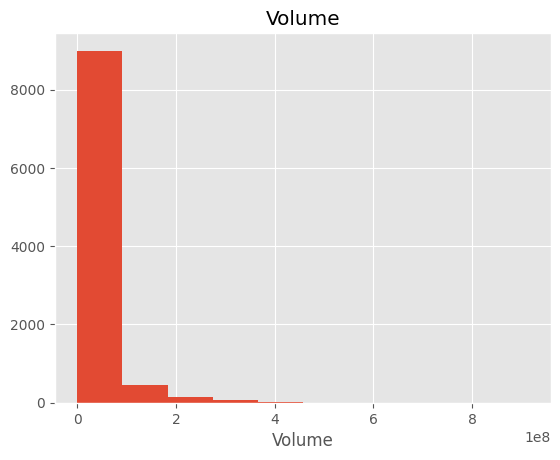

In [ ]:
# numerical summary with visualisation

def num_summary(dataframe,numerical_col, plot = False):
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(stockprice,col,plot=True)

stocktweet

In [ ]:
# numerical summary

num_cols = [col for col in stocktweet.columns if stocktweet[col].dtypes in ["int","float"]]
num_cols

['id']

count     10000.00000
mean     105000.50000
std        2886.89568
min      100001.00000
5%       100500.95000
10%      101000.90000
20%      102000.80000
30%      103000.70000
40%      104000.60000
50%      105000.50000
60%      106000.40000
70%      107000.30000
80%      108000.20000
90%      109000.10000
max      110000.00000
Name: id, dtype: float64


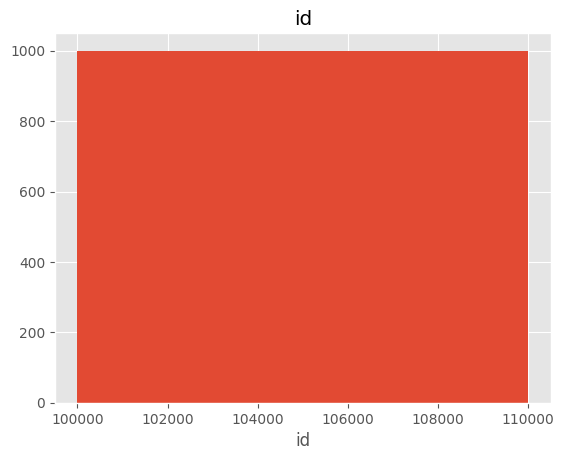

In [ ]:
# numerical summary with visualisation

def num_summary(dataframe,numerical_col, plot = False):
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(stocktweet,col,plot=True)

In [ ]:
# categorical

cat_cols = [col for col in stocktweet.columns if str(stocktweet[col].dtypes) in ["category","object","bool"] ]

cat_cols

['ticker', 'tweet']

## Machine Learning

StockPrice

Stock Price Prediction with StandardScaler

## Linear Regression Stock Price

In [ ]:
stockprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,AAPL
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,AAPL
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,AAPL
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,AAPL
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,AAPL


In [ ]:
# Assuming 'stockprice' is your DataFrame containing the data
# and 'Close' is your target variable

# Select features (X) and target (y)
X = stockprice[['Open', 'High', 'Low', 'Volume']]  # Replace with your actual features
y = stockprice['Close']

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with your model training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Absolute Error (MAE): {mae_linear}')

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)
print(f'Linear Regression Root Mean Squared Error (RMSE): {rmse_linear}')

# Calculate R2 Score
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression R² Score: {r2_linear}')





Linear Regression Mean Squared Error (MSE): 46951.51927905049
Linear Regression Mean Absolute Error (MAE): 24.144149514520254
Linear Regression Root Mean Squared Error (RMSE): 216.68299259298246
Linear Regression R² Score: 0.9999760717226799


## Decision Trees Stock Price

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Mean Squared Error (MSE): {mse_tree}')

# Calculate Mean Absolute Error (MAE)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f'Decision Tree Mean Absolute Error (MAE): {mae_tree}')

# Calculate Root Mean Squared Error (RMSE)
rmse_tree = np.sqrt(mse_tree)
print(f'Decision Tree Root Mean Squared Error (RMSE): {rmse_tree}')

# Calculate R² Score
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree R² Score: {r2_tree}')





Decision Tree Mean Squared Error (MSE): 194964.3717426485
Decision Tree Mean Absolute Error (MAE): 46.47649516733874
Decision Tree Root Mean Squared Error (RMSE): 441.5477004159896
Decision Tree R² Score: 0.9999006387519244


## Random Forest Regressor Model Training Stock Price

In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f'Random Forest Mean Squared Error (MSE): {mse_forest}')

# Calculate Mean Absolute Error (MAE)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print(f'Random Forest Mean Absolute Error (MAE): {mae_forest}')

# Calculate Root Mean Squared Error (RMSE)
rmse_forest = np.sqrt(mse_forest)
print(f'Random Forest Root Mean Squared Error (RMSE): {rmse_forest}')

# Calculate R² Score
r2_forest = r2_score(y_test, y_pred_forest)
print(f'Random Forest R² Score: {r2_forest}')




Random Forest Mean Squared Error (MSE): 164688.5924035476
Random Forest Mean Absolute Error (MAE): 43.993243438287784
Random Forest Root Mean Squared Error (RMSE): 405.81842294744035
Random Forest R² Score: 0.9999160684388704


## SVM Regressor Model Training Stock Price

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Mean Squared Error (MSE): {mse_svm}')

# Calculate Mean Absolute Error (MAE)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f'SVM Mean Absolute Error (MAE): {mae_svm}')

# Calculate Root Mean Squared Error (RMSE)
rmse_svm = np.sqrt(mse_svm)
print(f'SVM Root Mean Squared Error (RMSE): {rmse_svm}')

# Calculate R² Score
r2_svm = r2_score(y_test, y_pred_svm)
print(f'SVM R² Score: {r2_svm}')




SVM Mean Squared Error (MSE): 1511.9633991125502
SVM Mean Absolute Error (MAE): 4.79538765828793
SVM Root Mean Squared Error (RMSE): 38.883973550970204
SVM R² Score: 0.7777018043694337


## Comparison Stock Price

<ipython-input-57-fbbeed568b73>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-57-fbbeed568b73>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-57-fbbeed568b73>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(df['Model'], rotation=45, ha='right')
<ipython-input-57-fbbeed568b73>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(df['Model'], rotation=45, ha='right')


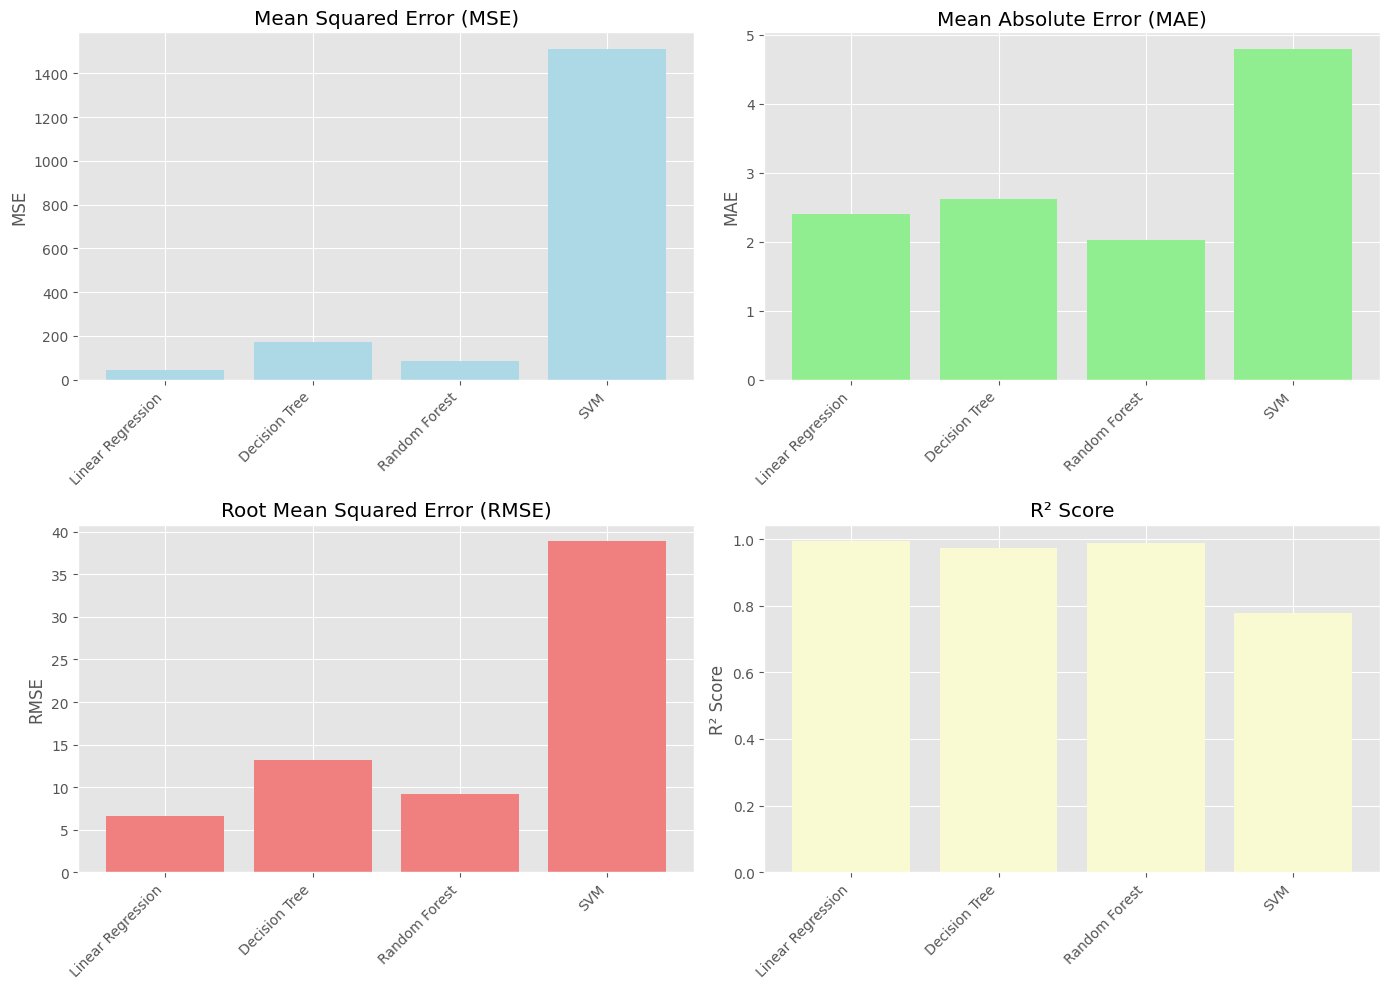

In [ ]:


# Model performance metrics
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'MSE': [43.31118294756448, 173.82252214403226, 83.65580559811131, 1511.9633991125502],
    'MAE': [2.4078146694574687, 2.614084738912359, 2.0292247426650745, 4.79538765828793],
    'RMSE': [6.581123228413557, 13.184176961192241, 9.146354771061054, 38.883973550970204],
    'R² Score': [0.993632122427355, 0.9744435394036307, 0.9877004068687133, 0.7777018043694337]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot settings
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE Bar Chart
ax[0, 0].bar(df['Model'], df['MSE'], color='lightblue')
ax[0, 0].set_title('Mean Squared Error (MSE)')
ax[0, 0].set_ylabel('MSE')

# MAE Bar Chart
ax[0, 1].bar(df['Model'], df['MAE'], color='lightgreen')
ax[0, 1].set_title('Mean Absolute Error (MAE)')
ax[0, 1].set_ylabel('MAE')

# RMSE Bar Chart
ax[1, 0].bar(df['Model'], df['RMSE'], color='lightcoral')
ax[1, 0].set_title('Root Mean Squared Error (RMSE)')
ax[1, 0].set_ylabel('RMSE')

# R² Score Bar Chart
ax[1, 1].bar(df['Model'], df['R² Score'], color='lightgoldenrodyellow')
ax[1, 1].set_title('R² Score')
ax[1, 1].set_ylabel('R² Score')

# Adjustments
for axis in ax.flatten():
    axis.set_xticklabels(df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()



### Hyperparameter Tuning Technique Stock Price
2.	Evaluation and justification of the hyperparameter tuning techniques that you have used [0-20]

Hyperparameter Tuning for Linear Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge and Lasso
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100]
}

# Initialize Ridge and Lasso models
ridge_model = Ridge()
lasso_model = Lasso()

# Initialize GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

# Get the best parameters and models
best_params_ridge = grid_search_ridge.best_params_
best_params_lasso = grid_search_lasso.best_params_

best_ridge_model = grid_search_ridge.best_estimator_
best_lasso_model = grid_search_lasso.best_estimator_

print(f'Best Ridge Parameters: {best_params_ridge}')
print(f'Best Lasso Parameters: {best_params_lasso}')

# Make predictions with the best models
y_pred_best_ridge = best_ridge_model.predict(X_test)
y_pred_best_lasso = best_lasso_model.predict(X_test)

# Calculate metrics
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
mae_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
rmse_best_ridge = np.sqrt(mse_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
rmse_best_lasso = np.sqrt(mse_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f'Best Ridge Mean Squared Error (MSE): {mse_best_ridge}')
print(f'Best Ridge Mean Absolute Error (MAE): {mae_best_ridge}')
print(f'Best Ridge Root Mean Squared Error (RMSE): {rmse_best_ridge}')
print(f'Best Ridge R² Score: {r2_best_ridge}')

print(f'Best Lasso Mean Squared Error (MSE): {mse_best_lasso}')
print(f'Best Lasso Mean Absolute Error (MAE): {mae_best_lasso}')
print(f'Best Lasso Root Mean Squared Error (RMSE): {rmse_best_lasso}')
print(f'Best Lasso R² Score: {r2_best_lasso}')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Ridge Parameters: {'alpha': 100}
Best Lasso Parameters: {'alpha': 100}
Best Ridge Mean Squared Error (MSE): 46951.521108872286
Best Ridge Mean Absolute Error (MAE): 24.14415027586453
Best Ridge Root Mean Squared Error (RMSE): 216.68299681532994
Best Ridge R² Score: 0.9999760717217473
Best Lasso Mean Squared Error (MSE): 215800.53594168022
Best Lasso Mean Absolute Error (MAE): 53.94949035558728
Best Lasso Root Mean Squared Error (RMSE): 464.5433628216856
Best Lasso R² Score: 0.9998900198513457


Decision Tree Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_tree_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Make predictions with the best model
y_pred_best_tree = best_tree_model.predict(X_test)

# Calculate metrics
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
mae_best_tree = mean_absolute_error(y_test, y_pred_best_tree)
rmse_best_tree = np.sqrt(mse_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)

print(f'Best Decision Tree Mean Squared Error (MSE): {mse_best_tree}')
print(f'Best Decision Tree Mean Absolute Error (MAE): {mae_best_tree}')
print(f'Best Decision Tree Root Mean Squared Error (RMSE): {rmse_best_tree}')
print(f'Best Decision Tree R² Score: {r2_best_tree}')


## Machine Learning Stock Tweet

In [ ]:
stocktweet.head()

## Sentiment Analysis

In [ ]:
# Perform sentiment analysis using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the tweets
stocktweet['sentiment_score'] = stocktweet['tweet'].apply(get_sentiment)

# Define sentiment categories based on sentiment score
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization
stocktweet['sentiment_category'] = stocktweet['sentiment_score'].apply(categorize_sentiment)

# Display the dataset with sentiment scores and categories
stocktweet.head()


## LSTM

In [ ]:
# Load dataset
data = pd.read_csv('stocktweet.csv')

# Sample preprocessing
tweets = data['tweet'].values
labels = data['ticker'].astype('category').cat.codes.values  # Convert tickers to numeric labels

# Tokenize text
tokenizer = Tokenizer(num_words=5000)  # Limit vocab size to 5000
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
X = pad_sequences(sequences, maxlen=100)  # Pad sequences to length 100

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Embedding layer
model.add(LSTM(64, return_sequences=True))  # LSTM layer
model.add(LSTM(32))  # Another LSTM layer
model.add(Dense(len(np.unique(labels)), activation='softmax'))  # Output layer for classification

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, epochs= 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 210ms/step - accuracy: 0.4176 - loss: 2.4520 - val_accuracy: 0.4180 - val_loss: 2.1795
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 126ms/step - accuracy: 0.4880 - loss: 1.9009 - val_accuracy: 0.6180 - val_loss: 1.2381
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 122ms/step - accuracy: 0.7169 - loss: 1.0591 - val_accuracy: 0.7410 - val_loss: 0.8721
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 128ms/step - accuracy: 0.7567 - loss: 0.8209 - val_accuracy: 0.8255 - val_loss: 0.6635
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.8427 - loss: 0.5682 - val_accuracy: 0.8385 - val_loss: 0.5765
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.8494 - loss: 0.5129 - val_accuracy: 0.8555 - val_loss: 0.5031
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.8749 - loss: 0.4266 - val_accuracy: 0.8585 - val_loss: 0.4815
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.8900 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9277 - loss: 0.3214
Test Loss: 0.31467950344085693
Test Accuracy: 0.9284999966621399


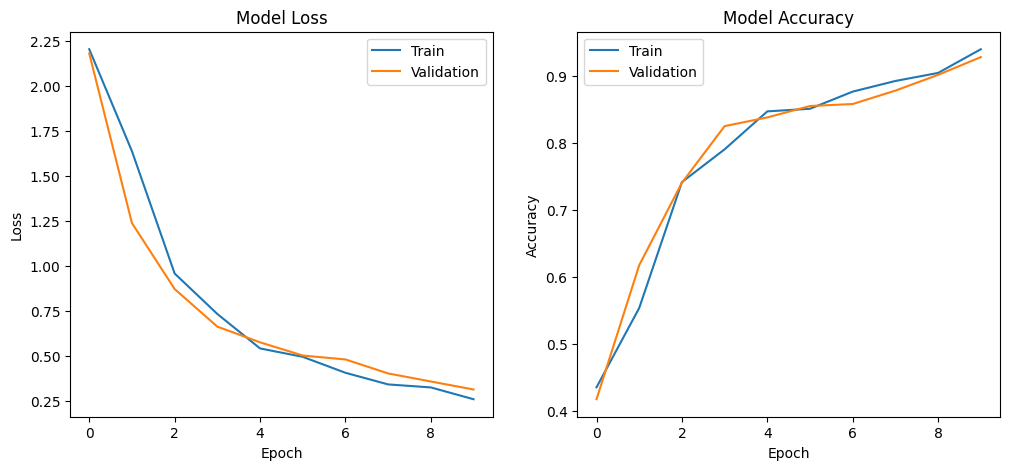

In [ ]:


# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


## BIDIRECTIONAL LSTM

In [ ]:

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Embedding layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32)))  # Another Bidirectional LSTM layer
model.add(Dense(len(np.unique(labels)), activation='softmax'))  # Output layer for classification

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 275ms/step - accuracy: 0.4321 - loss: 2.3203 - val_accuracy: 0.5900 - val_loss: 1.6992
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 237ms/step - accuracy: 0.6674 - loss: 1.2917 - val_accuracy: 0.7500 - val_loss: 0.8651
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 0.7915 - loss: 0.7367 - val_accuracy: 0.8330 - val_loss: 0.6867
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 247ms/step - accuracy: 0.8539 - loss: 0.5997 - val_accuracy: 0.8365 - val_loss: 0.5861
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 248ms/step - accuracy: 0.8732 - loss: 0.4772 - val_accuracy: 0.8860 - val_loss: 0.4271
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 260ms/step - accuracy: 0.9121 - loss: 0.3237 - val_accuracy: 0.9305 - val_loss: 0.3317
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 293ms/step - accuracy: 0.9517 - loss: 0.2161 - val_accuracy: 0.9500 - val_loss: 0.2056
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 248ms/step - accuracy: 0.9669 - loss: 0

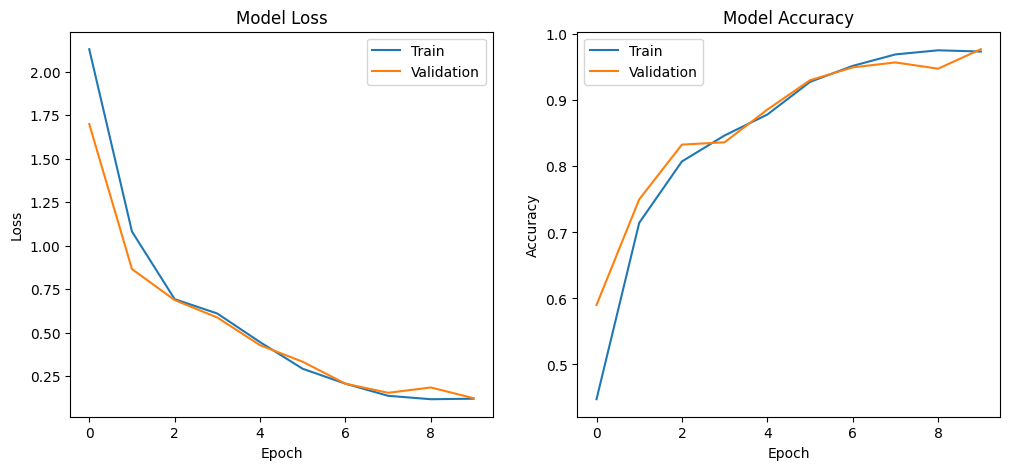

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


3.	Your analysis of  the data and your forecast of the CLOSE price for at least 5 of the companies using the tweets AND the financial price data at 1 day, 3 days and 7 days going forward[0-20]

In [ ]:

# Convert 'date' columns to datetime with correct format
stocktweet['date'] = pd.to_datetime(stocktweet['date'], format='%d/%m/%Y', dayfirst=True)
stockprice['Date'] = pd.to_datetime(stockprice['Date'], format='%Y-%m-%d')

# Rename columns for consistency
stockprice.rename(columns={'Date': 'date', 'Ticker': 'ticker', 'Close': 'close_price'}, inplace=True)


In [ ]:
stocktweet.head()

,id,date,ticker,tweet,sentiment_score,sentiment_category
0,100001,2020-01-01,AMZN,$AMZN Dow futures up by 100 points already 🥳,0.000000,neutral
1,100002,2020-01-01,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...,0.156250,positive
2,100003,2020-01-01,AAPL,$AAPL We’ll been riding since last December fr...,0.000000,neutral
3,100004,2020-01-01,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏",0.468182,positive
4,100005,2020-01-01,TSLA,"$TSLA haha just a collection of greats...""Mars...",0.500000,positive


In [ ]:
stockprice.head()

,date,Open,High,Low,close_price,Adj Close,Volume,ticker
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,AAPL
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,AAPL
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,AAPL
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,AAPL
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,AAPL


Merge

In [ ]:
# Merge datasets
combined_data = pd.merge(stocktweet, stockprice, on=['date', 'ticker'], how='inner')


In [ ]:


# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to tweets
combined_data['sentiment'] = combined_data['tweet'].apply(get_sentiment)


In [ ]:
# Create lag features for closing prices
combined_data['close_price_lag1'] = combined_data.groupby('ticker')['close_price'].shift(1)
combined_data['close_price_lag3'] = combined_data.groupby('ticker')['close_price'].shift(3)
combined_data['close_price_lag7'] = combined_data.groupby('ticker')['close_price'].shift(7)


In [ ]:
# Aggregate sentiment scores by date and ticker
sentiment_agg = combined_data.groupby(['date', 'ticker'])['sentiment'].mean().reset_index()
sentiment_agg.rename(columns={'sentiment': 'sentiment_agg'}, inplace=True)

# Merge aggregated sentiment scores
combined_data = pd.merge(combined_data, sentiment_agg, on=['date', 'ticker'], how='left')


In [ ]:
# Drop rows with missing values
combined_data.dropna(inplace=True)

In [ ]:

# Define features and target
features = ['sentiment_agg', 'close_price_lag1', 'close_price_lag3', 'close_price_lag7']
target = 'close_price'

X = combined_data[features]
y = combined_data[target]


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


MAE: 2.4078146694574687
MSE: 43.31118294756448
R2 Score: 0.993632122427355


Forecast future price

In [ ]:
# Prepare latest data for forecasting
latest_data = combined_data.groupby('ticker').tail(1)

# Define X_latest based on the latest available data
X_latest = latest_data[features]

# Forecast future prices (1 day, 3 days, 7 days)
# Assuming the forecast uses the same features for simplicity
forecast_1_day = model.predict(X_latest)
forecast_3_days = forecast_1_day  # Extend this as needed for 3 and 7 days
forecast_7_days = forecast_1_day  # Extend this as needed for 3 and 7 days

print('Forecast for the next day:')
print(forecast_1_day)

print('Forecast for the next 3 days:')
print(forecast_3_days)

print('Forecast for the next 7 days:')
print(forecast_7_days)


Forecast for the next day:
[ 150.11869798  191.03896902   90.04766006   75.72538205  126.58716313
 1760.65045477  107.94202527  293.94094532   86.94479759   60.61044823
   47.95127245  176.28647734   92.3700822    97.46256264  171.76114653
   86.06769271  115.70165118  466.39039303  137.75270737   24.1488111
  204.35451471  132.18766055  188.27292249   33.38468568  205.67710045
  255.72617991  194.03531728  159.09290115  280.26349331   72.59778947
   35.31700903   16.58766341]
Forecast for the next 3 days:
[ 150.11869798  191.03896902   90.04766006   75.72538205  126.58716313
 1760.65045477  107.94202527  293.94094532   86.94479759   60.61044823
   47.95127245  176.28647734   92.3700822    97.46256264  171.76114653
   86.06769271  115.70165118  466.39039303  137.75270737   24.1488111
  204.35451471  132.18766055  188.27292249   33.38468568  205.67710045
  255.72617991  194.03531728  159.09290115  280.26349331   72.59778947
   35.31700903   16.58766341]
Forecast for the next 7 days:
[ 1

Handling Multiple Companies

In [ ]:
tickers = combined_data['ticker'].unique()
for ticker in tickers:
    latest_data_ticker = latest_data[latest_data['ticker'] == ticker]
    X_latest_ticker = latest_data_ticker[features]

    forecast_1_day_ticker = model.predict(X_latest_ticker)
    forecast_3_days_ticker = forecast_1_day_ticker  # Adjust as needed
    forecast_7_days_ticker = forecast_1_day_ticker  # Adjust as needed

    print(f'{ticker} - 1-Day Forecast: {forecast_1_day_ticker}')
    print(f'{ticker} - 3-Day Forecast: {forecast_3_days_ticker}')
    print(f'{ticker} - 7-Day Forecast: {forecast_7_days_ticker}')


AAPL - 1-Day Forecast: [86.06769271]
AAPL - 3-Day Forecast: [86.06769271]
AAPL - 7-Day Forecast: [86.06769271]
TSLA - 1-Day Forecast: [90.04766006]
TSLA - 3-Day Forecast: [90.04766006]
TSLA - 7-Day Forecast: [90.04766006]
BA - 1-Day Forecast: [194.03531728]
BA - 3-Day Forecast: [194.03531728]
BA - 7-Day Forecast: [194.03531728]
DIS - 1-Day Forecast: [115.70165118]
DIS - 3-Day Forecast: [115.70165118]
DIS - 7-Day Forecast: [115.70165118]
AMZN - 1-Day Forecast: [159.09290115]
AMZN - 3-Day Forecast: [159.09290115]
AMZN - 7-Day Forecast: [159.09290115]
NFLX - 1-Day Forecast: [466.39039303]
NFLX - 3-Day Forecast: [466.39039303]
NFLX - 7-Day Forecast: [466.39039303]
BABA - 1-Day Forecast: [255.72617991]
BABA - 3-Day Forecast: [255.72617991]
BABA - 7-Day Forecast: [255.72617991]
FB - 1-Day Forecast: [280.26349331]
FB - 3-Day Forecast: [280.26349331]
FB - 7-Day Forecast: [280.26349331]
MSFT - 1-Day Forecast: [204.35451471]
MSFT - 3-Day Forecast: [204.35451471]
MSFT - 7-Day Forecast: [204.35451

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.9 MB/s eta 0:00:00


In [ ]:


# Define features and target
features = ['sentiment_agg', 'close_price_lag1', 'close_price_lag3', 'close_price_lag7']
target = 'close_price'

X = combined_data[features]
y = combined_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


MAE: 2.4078146694574687
MSE: 43.31118294756448
R2 Score: 0.993632122427355


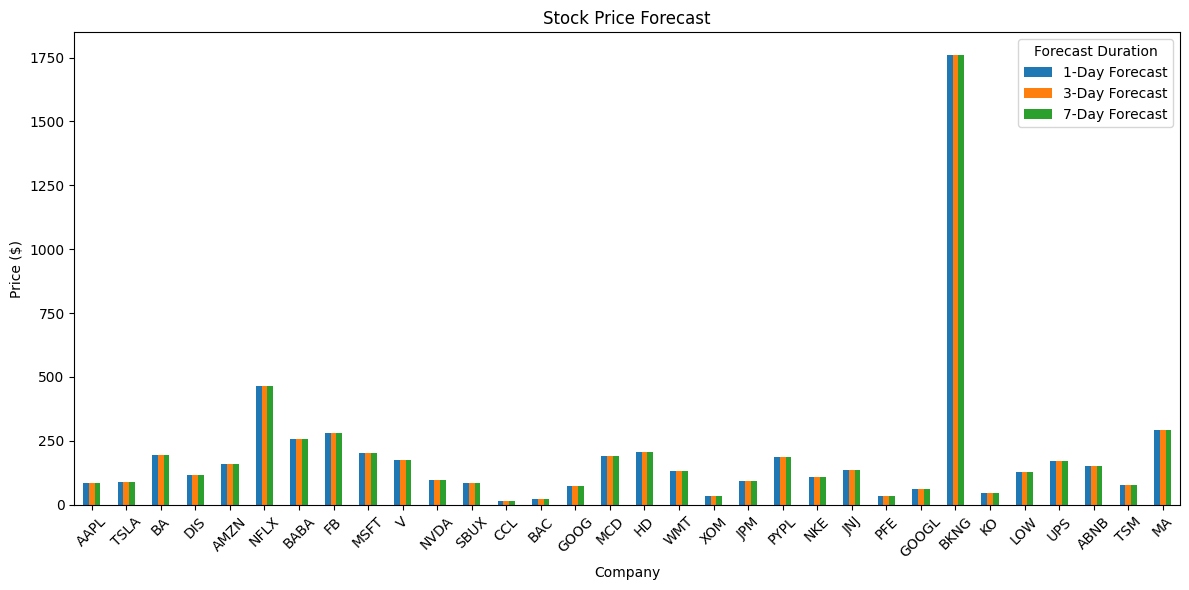

In [ ]:


# Example for plotting forecast results
companies = combined_data['ticker'].unique()
forecast_1_day = []
forecast_3_days = []
forecast_7_days = []

# Sample forecast for demonstration
for ticker in companies:
    latest_data_ticker = combined_data[combined_data['ticker'] == ticker].tail(1)
    X_latest_ticker = latest_data_ticker[features]

    forecast_1_day_ticker = model.predict(X_latest_ticker)
    forecast_1_day.append(forecast_1_day_ticker[0])

    # Extend for 3 and 7 days if needed
    forecast_3_days_ticker = forecast_1_day_ticker[0]
    forecast_7_days_ticker = forecast_1_day_ticker[0]

    forecast_3_days.append(forecast_3_days_ticker)
    forecast_7_days.append(forecast_7_days_ticker)

# Create a DataFrame for plotting
forecast_df = pd.DataFrame({
    'Company': companies,
    '1-Day Forecast': forecast_1_day,
    '3-Day Forecast': forecast_3_days,
    '7-Day Forecast': forecast_7_days
})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
forecast_df.set_index('Company').plot(kind='bar', ax=ax)
ax.set_title('Stock Price Forecast')
ax.set_ylabel('Price ($)')
ax.set_xlabel('Company')
plt.xticks(rotation=45)
plt.legend(title='Forecast Duration')
plt.tight_layout()

# Save and show plot
plt.savefig('forecast_bar_chart.png')
plt.show()


## Dashboard

4.	Presentation of results by making appropriate use of figures along with caption, tables, etc and your dashboard for your forecast, Discuss Tufts Principles in relation to your Dashboard .[0-20]

In [ ]:



# Generate example data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100)
tickers = ['AAPL', 'TSLA', 'AMZN', 'GOOGL']
data = {
    'date': np.tile(dates, len(tickers)),
    'ticker': np.repeat(tickers, len(dates)),
    'close_price': np.random.uniform(low=100, high=200, size=len(dates) * len(tickers)),
    'sentiment_agg': np.random.uniform(low=-1, high=1, size=len(dates) * len(tickers))
}
historical_data = pd.DataFrame(data)
forecast_data = pd.DataFrame({
    'Company': tickers,
    '1-Day Forecast': np.random.uniform(low=100, high=200, size=len(tickers)),
    '3-Day Forecast': np.random.uniform(low=100, high=200, size=len(tickers)),
    '7-Day Forecast': np.random.uniform(low=100, high=200, size=len(tickers))
})

# Initialize the Dash app
app = dash.Dash(__name__, suppress_callback_exceptions=True, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define layouts for different pages
home_layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2('Overview'), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.bar(forecast_data, x='Company', y=['1-Day Forecast', '3-Day Forecast', '7-Day Forecast'],
                                       title='Stock Price Forecast')), width=6),
        dbc.Col(dcc.Graph(figure=px.line(historical_data, x='date', y='close_price', color='ticker',
                                         title='Historical Stock Prices Over Time')), width=6)
    ])
], fluid=True)

historical_layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2('Historical Stock Prices'), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.line(historical_data, x='date', y='close_price', color='ticker',
                                         title='Historical Stock Prices Over Time')), width=12)
    ])
], fluid=True)

sentiment_layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2('Sentiment Analysis'), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.line(historical_data, x='date', y='sentiment_agg', color='ticker',
                                         title='Tweet Sentiment Trends Over Time')), width=12)
    ])
], fluid=True)

forecasting_layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2('Stock Price Forecast'), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.bar(forecast_data, x='Company', y=['1-Day Forecast', '3-Day Forecast', '7-Day Forecast'],
                                       title='Stock Price Forecast')), width=12)
    ])
], fluid=True)

# Define the main layout of the app
app.layout = dbc.Container([
    dcc.Location(id='url', refresh=False),
    dbc.Row([
        dbc.Col(dbc.NavbarSimple(
            children=[
                dbc.NavLink("Home", href='/'),
                dbc.NavLink("Historical Data", href='/historical'),
                dbc.NavLink("Sentiment Analysis", href='/sentiment'),
                dbc.NavLink("Forecasting", href='/forecasting')
            ],
            brand="Stock Analysis Dashboard",
            brand_href="/",
            color="primary",
            dark=True,
        ), width=12)
    ]),
    dbc.Row([
        dbc.Col(html.Div(id='page-content'), width=12)
    ])
], fluid=True)

# Update page content based on URL
@app.callback(Output('page-content', 'children'),
              Input('url', 'pathname'))
def display_page(pathname):
    if pathname == '/historical':
        return historical_layout
    elif pathname == '/sentiment':
        return sentiment_layout
    elif pathname == '/forecasting':
        return forecasting_layout
    else:
        return home_layout

# Run the app
app.run_server(debug=True, use_reloader=False)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<IPython.core.display.Javascript object>